# Aufgabe: Ist eine Iris mit den Werten [ 4.8,2.5,5.3,2.4 ] eine Iris-Virginica?
Zuerst: Umgebung einrichten und einen Überblick über das Dataset erhalten:

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True) # Wir wollen die wissenschaftliche Darstellung von langen Nachkommazahlen unterdrücken

iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

----------
Keys und features herausfinden:

In [2]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

--------
Es gibt 3 Targets: 'setosa', 'versicolor', 'virginica'. Wir suchen die, die den Wert '2' haben. Wir definieren unsere abhängige Variable y und weisen sie einem Array zu, das wir erstellen und das mit "0" und "1" gefüllt wird: "1" nur dann, wenn der entsprechende Wert in iris["target"] "2" lautete, denn die "2" steht für "virginica".

In [4]:
print(iris["target"])
y = (iris["target"] == 2).astype(np.int)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


--------
 Training: Wir erstellen 4 Arrays mit je 150 Zeilen, je 1 Array für jedes Feature:

In [5]:
X = np.empty(shape=(4, 150, 1))
X[0] = iris['data'][:, 0:1].reshape(-1, 1) # sepal length 
X[1] = iris['data'][:, 1:2].reshape(-1, 1) # sepal width 
X[2] = iris['data'][:, 2:3].reshape(-1, 1) # petal length
X[3] = iris['data'][:, 3:4].reshape(-1, 1) # petal width 

--------
Nun trainieren wir für jedes Feature ein Modell:

In [6]:
log_regs = np.array([\
    LogisticRegression(),\
    LogisticRegression(),\
    LogisticRegression(),\
    LogisticRegression()\
])

for i in range(0, X.shape[0]):
    x = X[i]
    log_regs[i].fit(x, y)

--------
Wir erstellen ein Array mit den Minimal- und Maximalwerten der einzelnen Features:

In [7]:
X_range = np.empty(shape=(4,2))
for i in range(0, X.shape[0]):
    X_range[i] = np.array([X[i].min(), X[i].max()])
X_range

array([[4.3, 7.9],
       [2. , 4.4],
       [1. , 6.9],
       [0.1, 2.5]])

--------
Und generieren Testsamples für jedes Feature innerhalb der jeweiligen Grenzen:

In [8]:
sample_size = 1000
X_samples = np.empty(shape=(4, 1000, 1))
for i in range(0, X_range.shape[0]):
    X_samples[i] = np.linspace(X_range[i][0], X_range[i][1], sample_size).reshape(-1, 1)

X_samples

array([[[4.3       ],
        [4.3036036 ],
        [4.30720721],
        ...,
        [7.89279279],
        [7.8963964 ],
        [7.9       ]],

       [[2.        ],
        [2.0024024 ],
        [2.0048048 ],
        ...,
        [4.3951952 ],
        [4.3975976 ],
        [4.4       ]],

       [[1.        ],
        [1.00590591],
        [1.01181181],
        ...,
        [6.88818819],
        [6.89409409],
        [6.9       ]],

       [[0.1       ],
        [0.1024024 ],
        [0.1048048 ],
        ...,
        [2.4951952 ],
        [2.4975976 ],
        [2.5       ]]])

--------
Wir berechnen die Wahrscheinlichkeiten für jedes Feature-Sample-Set:

In [9]:
y_probs = np.empty(shape=(4, 1000, 2))
for i in range(0, log_regs.shape[0]):
    samples = X_samples[i]
    log_reg = log_regs[i]
    y_probs[i] = log_reg.predict_proba(samples)
    print(np.around(samples,decimals=9))
    print(np.around(y_probs,decimals=9))

[[4.3       ]
 [4.3036036 ]
 [4.30720721]
 [4.31081081]
 [4.31441441]
 [4.31801802]
 [4.32162162]
 [4.32522522]
 [4.32882883]
 [4.33243243]
 [4.33603604]
 [4.33963964]
 [4.34324324]
 [4.34684685]
 [4.35045045]
 [4.35405405]
 [4.35765766]
 [4.36126126]
 [4.36486487]
 [4.36846847]
 [4.37207207]
 [4.37567568]
 [4.37927928]
 [4.38288288]
 [4.38648649]
 [4.39009009]
 [4.39369369]
 [4.3972973 ]
 [4.4009009 ]
 [4.40450451]
 [4.40810811]
 [4.41171171]
 [4.41531531]
 [4.41891892]
 [4.42252252]
 [4.42612613]
 [4.42972973]
 [4.43333333]
 [4.43693694]
 [4.44054054]
 [4.44414414]
 [4.44774775]
 [4.45135135]
 [4.45495495]
 [4.45855856]
 [4.46216216]
 [4.46576577]
 [4.46936937]
 [4.47297297]
 [4.47657658]
 [4.48018018]
 [4.48378378]
 [4.48738739]
 [4.49099099]
 [4.49459459]
 [4.4981982 ]
 [4.5018018 ]
 [4.50540541]
 [4.50900901]
 [4.51261261]
 [4.51621622]
 [4.51981982]
 [4.52342342]
 [4.52702703]
 [4.53063063]
 [4.53423423]
 [4.53783784]
 [4.54144144]
 [4.54504505]
 [4.54864865]
 [4.55225225]
 [4.55

 [2.5       ]]
[[[0.98914619 0.01085381]
  [0.98905959 0.01094042]
  [0.98897229 0.01102771]
  ...
  [0.02934182 0.97065818]
  [0.02911382 0.97088617]
  [0.02888755 0.97111245]]

 [[0.52128513 0.47871487]
  [0.521636   0.478364  ]
  [0.52198685 0.47801315]
  ...
  [0.81563596 0.18436404]
  [0.81584731 0.18415269]
  [0.81605847 0.18394153]]

 [[0.9999991  0.0000009 ]
  [0.99999908 0.00000092]
  [0.99999906 0.00000094]
  ...
  [0.000727   0.999273  ]
  [0.00071175 0.99928825]
  [0.00069683 0.99930317]]

 [[0.99884373 0.00115627]
  [0.99883165 0.00116835]
  [0.99881943 0.00118057]
  ...
  [0.02615572 0.97384428]
  [0.02589187 0.97410813]
  [0.02563061 0.97436939]]]


--------
Nun haben wir genug Daten, um die Regressionsdiagramme für jedes Feature darzustellen:

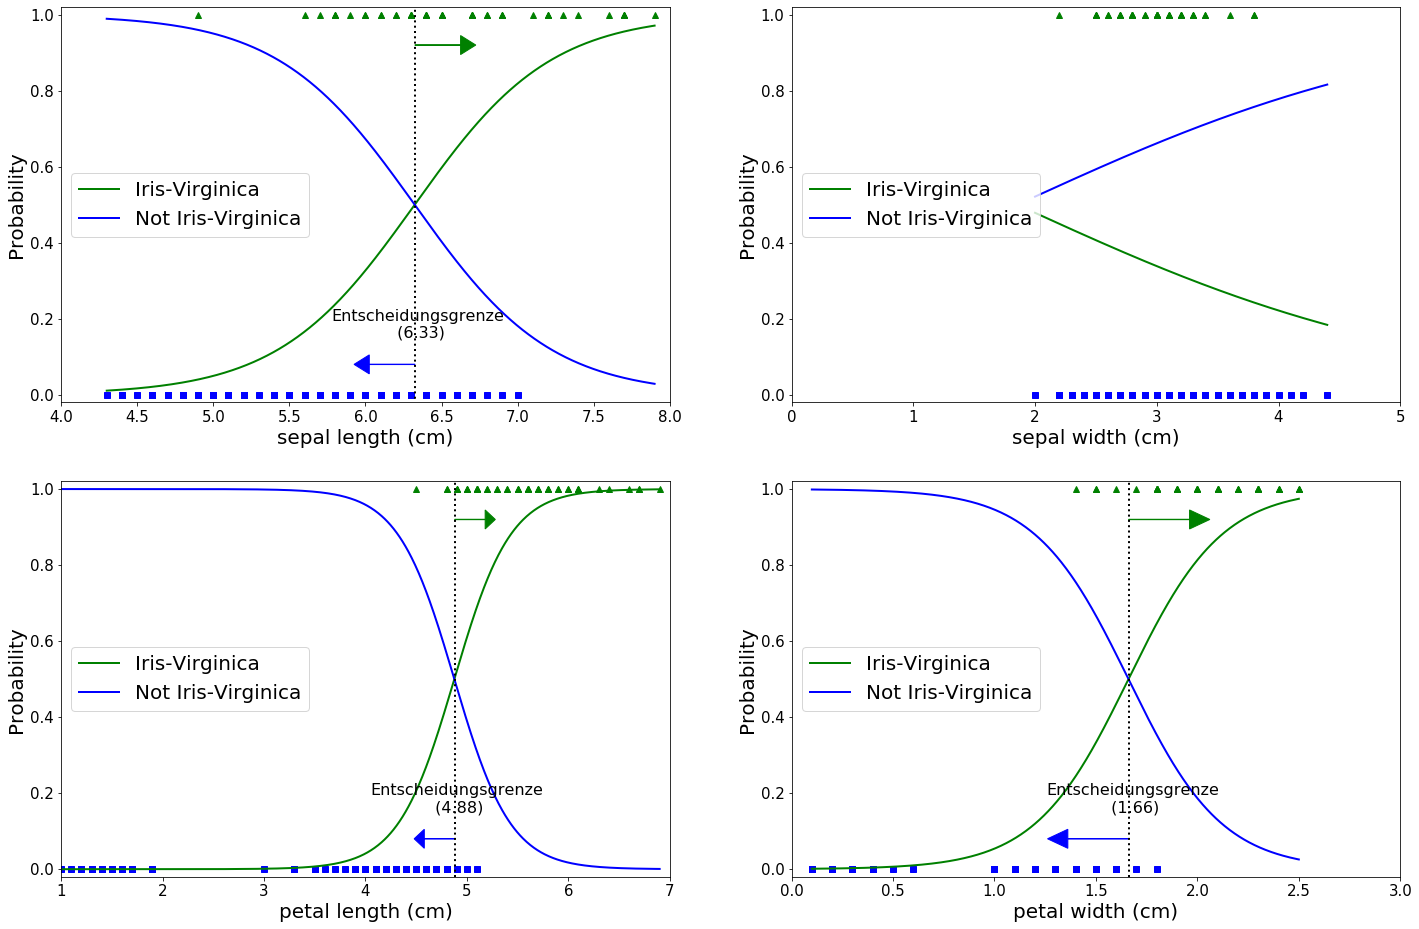

In [10]:
plt.figure(figsize=(24, 16))

y_proba = (iris["target"] == 2).astype(np.int)

for i in range(0, len(iris['feature_names'])):
    boundary_samples = X_samples[i][y_probs[i][:, 1] >= 0.5]
    decision_boundary = 0
    x_axis_min = np.floor(X_range[i][0])
    x_axis_max = np.ceil(X_range[i][1])
        
    plt.subplot(2, 2, i+1)
    plt.plot(X[i][y_proba==1], y_proba[y_proba==1], marker='^', color='g', linestyle='None')
    plt.plot(X[i][y_proba==0], y_proba[y_proba==0], marker="s", color='b', linestyle='None')
    plt.plot(X_samples[i], y_probs[i][:, 1], color='g', linewidth=2, label='Iris-Virginica')
    plt.plot(X_samples[i], y_probs[i][:, 0], 'b', linewidth=2, label='Not Iris-Virginica')
    
    if (len(boundary_samples) > 0):
        decision_boundary = boundary_samples[0]
        plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
        plt.text(decision_boundary+0.02, 0.15, 'Entscheidungsgrenze\n (%.2f)' % decision_boundary, fontsize=16, color="k", ha="center")
        plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
        plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
    else:
        x_axis_min = 0
        x_axis_max = 5
    
    plt.tick_params(axis='x', labelsize=15)
    plt.tick_params(axis='y', labelsize=15)
    plt.axis([x_axis_min, x_axis_max, -0.02, 1.02])
    plt.legend(loc='center left', fontsize=20)
    plt.xlabel(iris['feature_names'][i], fontsize=20)
    plt.ylabel('Probability', fontsize=20)

------
Sepal width hat keine Entscheidungsgrenze, hilft uns also nicht weiter. Wir machen mit den drei anderen Features weiter:

In [11]:
y = iris.target
X = np.column_stack((iris.data[:, 0:1], iris.data[:, 2:4]))

------
Wir geben die Daten aus der Aufgabenstellung in unser Modell, aber ohne den Wert für sepal width (2.5):

In [12]:
log_reg_classifier = LogisticRegression()
log_reg_classifier.fit(X, y)

iris_sample = np.array([4.8, 5.3, 2.4]).reshape(1,-1)
iris_sample

array([[4.8, 5.3, 2.4]])

In [13]:
import math
iris_sample_probs = log_reg_classifier.predict_proba(iris_sample)

print("Wahrscheinlichkeit für Setosa: " + "%.10f" %iris_sample_probs[:,0:1])
print("Wahrscheinlichkeit für Versicolour: " + "%.10f" %iris_sample_probs[:,1:2])
print("Wahrscheinlichkeit für Virginica: " + "%.10f" %iris_sample_probs[:,2:3])

Wahrscheinlichkeit für Setosa: 0.0000118149
Wahrscheinlichkeit für Versicolour: 0.0144429871
Wahrscheinlichkeit für Virginica: 0.9855451980


# Die Antwort lautet: Ja.